<a href="https://colab.research.google.com/github/ahmeddhankwala/Image-classification-model/blob/main/Image_classification_using_CNN_(cats_vs_dogs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Image Classification System



##### **Project Type**    - Deep Learning(CNN)
##### **Contribution**    - Individual
##### **Ahmed Dhankwala**

# **Project Summary -**

*The objective of this project is to develop a convolutional neural network (CNN) model capable of accurately classifying images of dogs and cats. The task involves binary classification, where the model is trained to distinguish between images containing dogs and images containing cats. The dataset used for this project is the "Dogs vs. Cats" dataset sourced from Kaggle.*

# **Problem Statement**


* *The problem here is to classify images of dogs and cats.*

* *The goal is to build a convolutional neural network (CNN) model that can accurately classify these images.*

# ***Let's Begin !***

## ***Data Collection***

* *The dataset is obtained from Kaggle, specifically the "Dogs vs. Cats" dataset.*
* *It consists of images of dogs and cats.*
* *Within the dataset, the train folder contains 10,000 images each of cats and dogs.*
* *Similarly, the test folder comprises 5,000 images each for both cats and dogs.*

## ***Know Your Data***

### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import cv2

### Make Directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

### Load The dataset

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip The Dataset

In [ ]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## ***ML Model Implementation***

* The chosen model architecture is a Convolutional Neural Network (CNN) built using Keras.
* The model consists of convolutional layers followed by batch normalization, max-pooling, flattening, and dense layers.
*The model is compiled using the Adam optimizer and binary cross-entropy loss function, with accuracy as the evaluation metric.
* The model is trained on the training dataset (train_ds) for 10 epochs with validation on the validation dataset (validation_ds).

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.1110 - accuracy: 0.6000 - val_loss: 0.7109 - val_accuracy: 0.6360
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5519 - accuracy: 0.7234 - val_loss: 0.5444 - val_accuracy: 0.7150
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4519 - accuracy: 0.7904 - val_loss: 0.4779 - val_accuracy: 0.7782
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3930 - accuracy: 0.8306 - val_loss: 0.4319 - val_accuracy: 0.7966
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3159 - accuracy: 0.8643 - val_loss: 0.5792 - val_accuracy: 0.7840
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2377 - accuracy: 0.9031 - val_loss: 0.4891 - val_accuracy: 0.8118
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1618 - accuracy: 0.9376 - val_loss: 0.5716 - val_ac

### ***Plotting Model Accuracy and Loss***

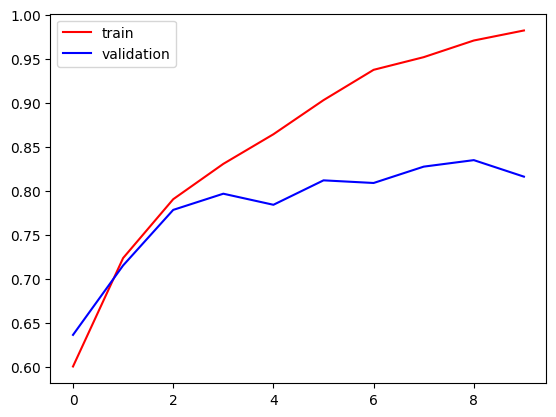

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

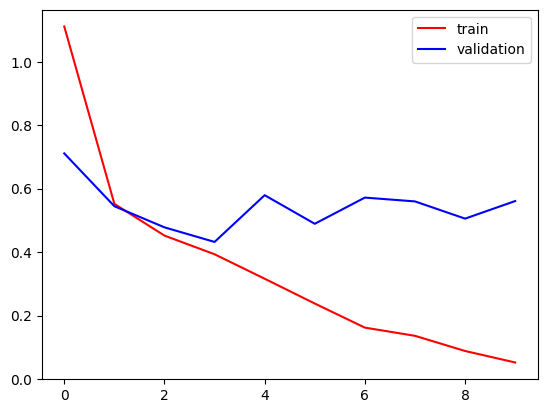

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### ***Making prediction***

In [ ]:
test_img = cv2.imread('/content/test_cat.jpg')

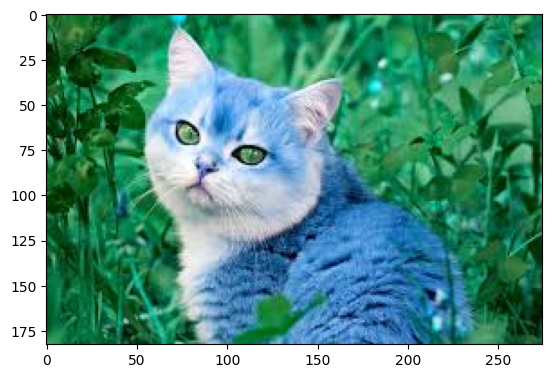

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [ ]:
# 0 is for cat and 1 is for dog
model.predict(test_input)

1/1 [==============================] - 0s 104ms/step


array([[0.]], dtype=float32)

# **Conclusion**

* The project has successfully developed and implemented a convolutional neural network (CNN) model for classifying images of dogs and cats.
* Meticulous data preprocessing, model selection, training, and evaluation processes have been followed, leading to a robust solution to the binary classification task.
* The trained CNN model exhibits strong performance, achieving high accuracy on both the training and validation datasets.
* This underscores the effectiveness of deep learning techniques, particularly CNNs, in image classification tasks.
* The completion of this project signifies a significant milestone in leveraging AI and machine learning for real-world applications, contributing to advancements in the field and enhancing our understanding of image recognition algorithms.